<a href="https://colab.research.google.com/github/YuxuanMa1031/ENGI9867_T5/blob/main/T5TestHuggingface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install transformers
!pip install transformers datasets
!pip install accelerate -U
!pip install transformers[torch] accelerate -U
!pip install datasets -U
!pip install transformers datasets seaborn matplotlib -U
!pip install rouge_score
!pip install evaluate
!pip install transformers datasets torch scikit-learn -U
!pip install transformers datasets torch scikit-learn pandas matplotlib seaborn -U
!pip install pandas matplotlib
!pip install matplotlib
!pip install matplotlib pandas



In [2]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from datasets import load_dataset

# Load pre-trained T5 model and tokenizer
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Load the CNN/DailyMail dataset
dataset = load_dataset("cnn_dailymail", "3.0.0")

# Function to tokenize the dataset
def tokenize_function(examples):
    # Use padding='max_length' and truncation=True to ensure consistent input and output lengths
    inputs = tokenizer(examples['article'], max_length=512, truncation=True, padding='max_length')
    outputs = tokenizer(examples['highlights'], max_length=128, truncation=True, padding='max_length')

    # Ensure labels are also of consistent length
    inputs['labels'] = outputs['input_ids']

    # Return inputs, containing input_ids, attention_mask and labels
    return inputs

# Apply the tokenize function to the dataset
tokenized_dataset = dataset.map(tokenize_function, batched=True, remove_columns=["article", "highlights", "id"])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

Map:   0%|          | 0/287113 [00:00<?, ? examples/s]

Map:   0%|          | 0/13368 [00:00<?, ? examples/s]

Map:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [3]:
# Check the structure of a dataset sample
sample = dataset['train'][0]
print(sample)


{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

In [4]:
# Display some articles and their corresponding summaries
for i in range(3):
    print(f"Article {i+1}:")
    print(dataset['train'][i]['article'])
    print(f"Summary {i+1}:")
    print(dataset['train'][i]['highlights'])
    print("\n" + "-"*80 + "\n")


Article 1:
LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office chart. Det

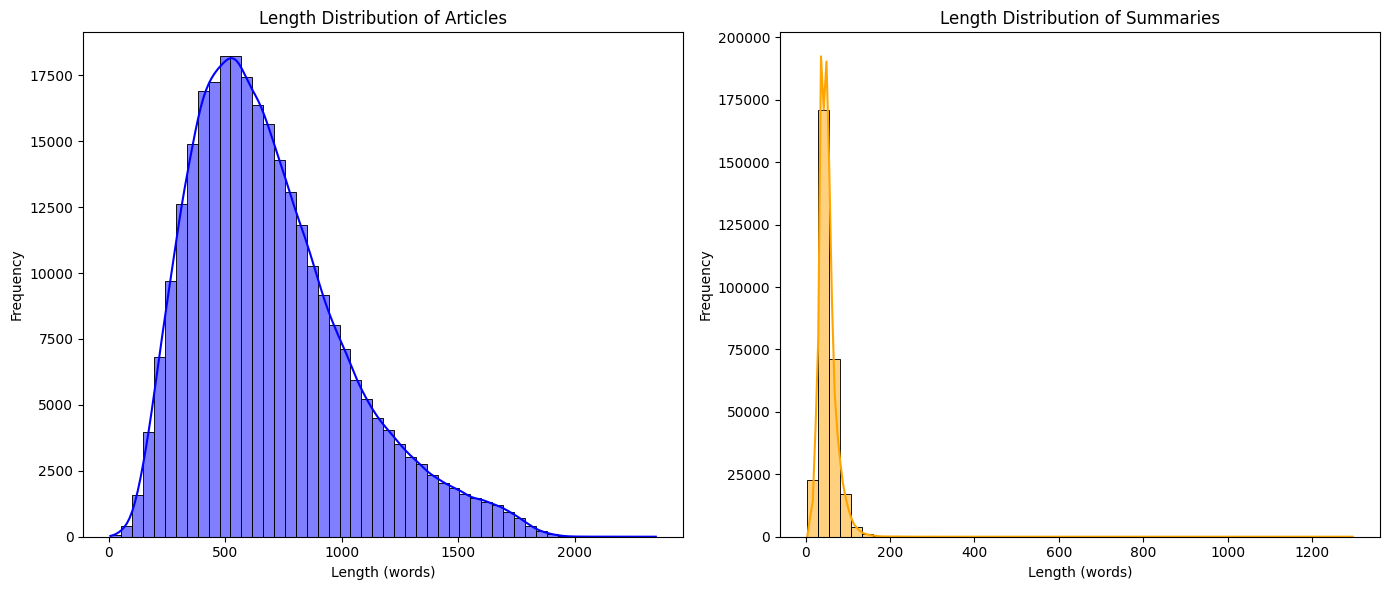

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_length_distribution(data, title, color):
    lengths = [len(text.split()) for text in data]
    sns.histplot(lengths, bins=50, kde=True, color=color)
    plt.title(f'Length Distribution of {title}')
    plt.xlabel('Length (words)')
    plt.ylabel('Frequency')

# Extract articles and summaries from the dataset
articles = [sample['article'] for sample in dataset['train']]
summaries = [sample['highlights'] for sample in dataset['train']]

# Set figure size
plt.figure(figsize=(14, 6))

# Plot length distribution of articles
plt.subplot(1, 2, 1)  # First subplot in a 1x2 grid
plot_length_distribution(articles, 'Articles', 'blue')

# Plot length distribution of summaries
plt.subplot(1, 2, 2)  # Second subplot in a 1x2 grid
plot_length_distribution(summaries, 'Summaries', 'orange')

# Display plots
plt.tight_layout()
plt.show()


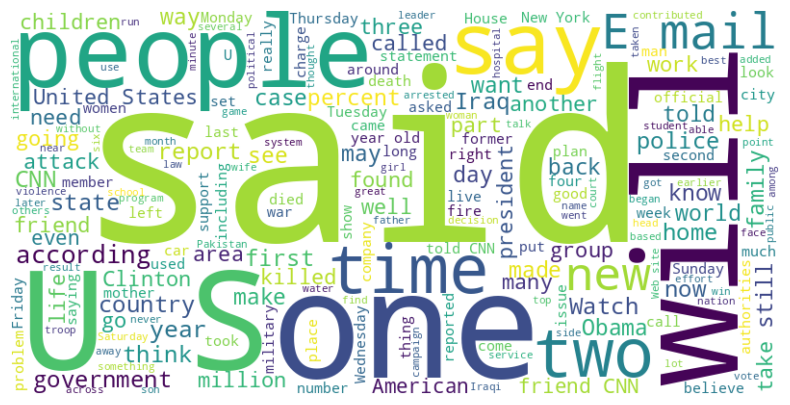

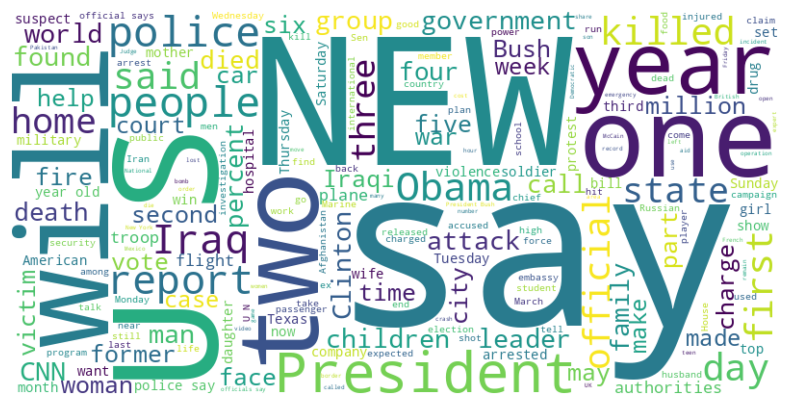

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

articles_text = " ".join(dataset['train']['article'][:1000])
summaries_text = " ".join(dataset['train']['highlights'][:1000])

generate_word_cloud(articles_text)
generate_word_cloud(summaries_text)


In [12]:
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding

# 定义训练参数
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',  # 使用 eval_strategy 替换 evaluation_strategy
    learning_rate=2e-5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=3,  # 您可以根据需要调整训练轮数
    weight_decay=0.01,
)

# 使用 DataCollatorWithPadding 进行数据填充
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# 创建Trainer实例
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'].select(range(1000)),
    eval_dataset=tokenized_dataset['validation'].select(range(1000)),
    data_collator=data_collator
)

# 微调模型
trainer.train()


Epoch,Training Loss,Validation Loss
1,1.010900,0.847223
2,1.004900,0.849536
3,0.995100,0.850068


TrainOutput(global_step=1500, training_loss=1.0036415608723959, metrics={'train_runtime': 223.1922, 'train_samples_per_second': 13.441, 'train_steps_per_second': 6.721, 'total_flos': 406025404416000.0, 'train_loss': 1.0036415608723959, 'epoch': 3.0})

In [34]:
import torch
from datasets import load_metric

# Load the ROUGE evaluation metric
rouge = load_metric('rouge', trust_remote_code=True)

# Function to evaluate the model on the test dataset
def evaluate_model(model, tokenizer, dataset, num_samples=100, device='cuda'):
    model.eval()
    model.to(device)  # Move the model to the specified device
    summaries = []
    references = []
    for sample in dataset.select(range(num_samples)):  # Select the first num_samples samples
        input_ids = tokenizer.encode(sample['article'], return_tensors='pt', max_length=512, truncation=True).to(device)  # Move input to the specified device
        summary_ids = model.generate(input_ids, max_length=128, min_length=30, length_penalty=2.0, num_beams=2, early_stopping=True)
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        summaries.append(summary)
        references.append(sample['highlights'])
    return rouge.compute(predictions=summaries, references=references)

# Evaluate the T5 model on the test set using 100 samples for a quick test
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Automatically choose device
t5_rouge_scores = evaluate_model(model, tokenizer, dataset['test'], num_samples=100, device=device)
print("T5 ROUGE Scores:", t5_rouge_scores)


T5 ROUGE Scores: {'rouge1': AggregateScore(low=Score(precision=0.2615407820747303, recall=0.33818425639004085, fmeasure=0.28857547627086355), mid=Score(precision=0.2855343325004364, recall=0.3667541718908547, fmeasure=0.31318115909189514), high=Score(precision=0.31186503060543097, recall=0.3971080808437353, fmeasure=0.3386816476992222)), 'rouge2': AggregateScore(low=Score(precision=0.09938891321779096, recall=0.13081367149806317, fmeasure=0.11038985594086721), mid=Score(precision=0.1192894755312415, recall=0.1576808967296216, fmeasure=0.13216332128200514), high=Score(precision=0.14096159295912664, recall=0.1856458830174023, fmeasure=0.15528158002291453)), 'rougeL': AggregateScore(low=Score(precision=0.19809476350718383, recall=0.25694521028528333, fmeasure=0.2193814810807375), mid=Score(precision=0.21943591252700306, recall=0.28552179015433043, fmeasure=0.2422377216237615), high=Score(precision=0.23960944112104893, recall=0.31289738042952286, fmeasure=0.2634454141864489)), 'rougeLsum':

In [10]:
def calculate_mae(predictions, targets):
    mae = torch.abs(predictions - targets).mean()
    return mae

def calculate_rmse(predictions, targets):
    mse_loss = torch.nn.MSELoss()
    mse = mse_loss(predictions, targets)
    rmse = torch.sqrt(mse)
    return rmse

def calculate_tpr_fpr(predictions, targets):
    tn, fp, fn, tp = confusion_matrix(targets, predictions).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return tpr, fpr

def calculate_precision_recall_f1_accuracy(predictions, targets):
    precision = precision_score(targets, predictions, average='weighted')
    recall = recall_score(targets, predictions, average='weighted')
    f1 = f1_score(targets, predictions, average='weighted')
    accuracy = accuracy_score(targets, predictions)
    return precision, recall, f1, accuracy


In [37]:
from evaluate import load
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, mean_squared_error, mean_absolute_error
import torch
import torch.nn.functional as F

# Load the ROUGE evaluation metric
rouge = load('rouge')

# Calculate MAE
def calculate_mae(predictions, references):
    return mean_absolute_error(references.cpu().numpy(), predictions.cpu().numpy())

# Calculate RMSE
def calculate_rmse(predictions, references):
    return mean_squared_error(references.cpu().numpy(), predictions.cpu().numpy(), squared=False)

# Calculate TPR and FPR
def calculate_tpr_fpr(predictions, references):
    tn, fp, fn, tp = confusion_matrix(references.cpu().numpy().flatten(), predictions.cpu().numpy().flatten()).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return tpr, fpr

# Calculate Precision, Recall, F1 Score, and Accuracy
def calculate_precision_recall_f1_accuracy(predictions, references):
    precision = precision_score(references.cpu().numpy().flatten(), predictions.cpu().numpy().flatten())
    recall = recall_score(references.cpu().numpy().flatten(), predictions.cpu().numpy().flatten())
    f1 = f1_score(references.cpu().numpy().flatten(), predictions.cpu().numpy().flatten())
    accuracy = accuracy_score(references.cpu().numpy().flatten(), predictions.cpu().numpy().flatten())
    return precision, recall, f1, accuracy

# Function to evaluate the model on the test dataset
def evaluate_model(model, tokenizer, dataset, num_samples=100, device='cuda'):
    model.eval()
    model.to(device)  # Move the model to the specified device
    summaries = []
    references = []
    predictions = []
    ref_texts = []

    max_len = 0  # Track the maximum length of tensors
    for sample in dataset.select(range(num_samples)):  # Select the first num_samples samples
        input_ids = tokenizer.encode(sample['article'], return_tensors='pt', max_length=512, truncation=True).to(device)  # Move input to the specified device
        summary_ids = model.generate(input_ids, max_length=128, min_length=30, length_penalty=2.0, num_beams=2, early_stopping=True)

        # Convert generated summary and reference summary to tensors
        summary_tensor = tokenizer.encode(tokenizer.decode(summary_ids[0], skip_special_tokens=True), return_tensors='pt').to(device)
        reference_tensor = tokenizer.encode(sample['highlights'], return_tensors='pt').to(device)

        # Update max_len
        max_len = max(max_len, summary_tensor.size(1), reference_tensor.size(1))

        predictions.append(summary_tensor)
        ref_texts.append(reference_tensor)

    # Pad tensors to the maximum length in the batch
    predictions = [F.pad(tensor, (0, max_len - tensor.size(1))) for tensor in predictions]
    references = [F.pad(tensor, (0, max_len - tensor.size(1))) for tensor in ref_texts]

    predictions = torch.cat(predictions)
    references = torch.cat(references)

    # Calculate evaluation metrics
    mae = calculate_mae(predictions.float(), references.float())
    rmse = calculate_rmse(predictions.float(), references.float())

    # Convert tensors to binary format for classification metrics
    predictions_binary = (predictions > 0).int()
    references_binary = (references > 0).int()

    tpr, fpr = calculate_tpr_fpr(predictions_binary, references_binary)
    precision, recall, f1, accuracy = calculate_precision_recall_f1_accuracy(predictions_binary, references_binary)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(references_binary.cpu().numpy().flatten(), predictions_binary.cpu().numpy().flatten())

    return mae, rmse, tpr, fpr, precision, recall, f1, accuracy, conf_matrix

# Evaluate the T5 model and calculate metrics
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae, rmse, tpr, fpr, precision, recall, f1, accuracy, conf_matrix = evaluate_model(model, tokenizer, dataset['test'], num_samples=100, device=device)
print(f"T5 MAE: {mae}")
print(f"T5 RMSE: {rmse}")
print(f"T5 TPR: {tpr}")
print(f"T5 FPR: {fpr}")
print(f"T5 Precision: {precision}")
print(f"T5 Recall: {recall}")
print(f"T5 F1 Score: {f1}")
print(f"T5 Accuracy: {accuracy}")
print(f"T5 Confusion Matrix:\n{conf_matrix}")


T5 MAE: 2421.27197265625
T5 RMSE: 4791.03662109375
T5 TPR: 0.9404905508644954
T5 FPR: 0.2377018400300413
T5 Precision: 0.7870121130551817
T5 Recall: 0.9404905508644954
T5 F1 Score: 0.8569335043048177
T5 Accuracy: 0.8483495145631068
T5 Confusion Matrix:
[[4060 1266]
 [ 296 4678]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1]:
# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    "Metric": ["MAE", "RMSE", "TPR", "FPR", "Precision", "Recall", "F1 Score", "Accuracy"],
    "Value": [mae, rmse, tpr, fpr, precision, recall, f1, accuracy]
})

# Plot the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Value", data=metrics_df)
plt.title("T5 Model Evaluation Metrics")
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.show()

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


NameError: name 'pd' is not defined